In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
eng_in = pd.read_csv("engineInputs.csv")
eng_in.head()

,In1,In2
0,17.5,576.2
1,35.9,598.6
2,31.4,612.1
3,23.7,624.2
4,20.2,635.2


In [3]:
eng_tar = pd.read_csv("engineTargets.csv")
eng_tar.head()

,T1,T2
0,57.6,848
1,24.8,905
2,22.3,578
3,15.6,382
4,16.5,298


In [4]:
eng_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   In1     1199 non-null   float64
 1   In2     1199 non-null   float64
dtypes: float64(2)
memory usage: 18.9 KB


In [5]:
eng_in.isna().sum()

In1    0
In2    0
dtype: int64

In [6]:
eng_tar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T1      1199 non-null   float64
 1   T2      1199 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 18.9 KB


In [7]:
eng_tar.isna().sum()

T1    0
T2    0
dtype: int64

In [8]:
engine = pd.concat([eng_in.reset_index(drop=True),eng_tar.reset_index(drop=True)],axis=1)
engine.head()

,In1,In2,T1,T2
0,17.5,576.2,57.6,848
1,35.9,598.6,24.8,905
2,31.4,612.1,22.3,578
3,23.7,624.2,15.6,382
4,20.2,635.2,16.5,298


In [9]:
X = engine.drop(['T1', 'T2'], axis=1).values
y2 = engine[['T1','T2']]
#y1 = ((engine['T1']).values).reshape(-1, 1)
#y2 = ((engine['T2']).values).reshape(-1, 1)

scaler = StandardScaler()
y2 = scaler.fit_transform(y2)
#y1 = scaler.fit_transform(y1)
#y2 = scaler.fit_transform(y2)

In [10]:
modelos = [('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())]
'''('LR',LinearRegression()),
           ('Decision Tree',DecisionTreeRegressor()),
           ('KNN',KNeighborsRegressor())'''

"('LR',LinearRegression()),\n           ('Decision Tree',DecisionTreeRegressor()),\n           ('KNN',KNeighborsRegressor())"

In [11]:
resultado_R = []
resultado_R2 = []
resultado_SSE = []
resultado_MAE = []
resultado_MSE = []
resultado_RMSE = []
resultado_MAPE = []

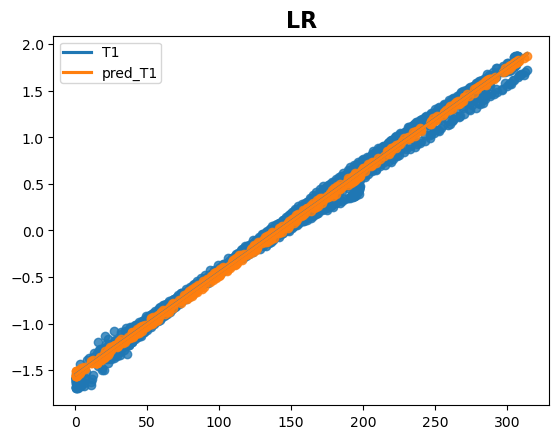

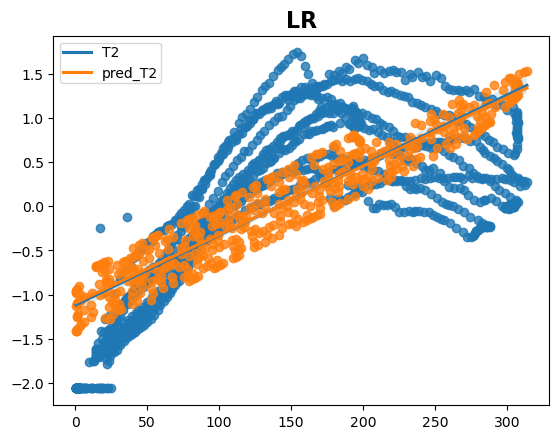

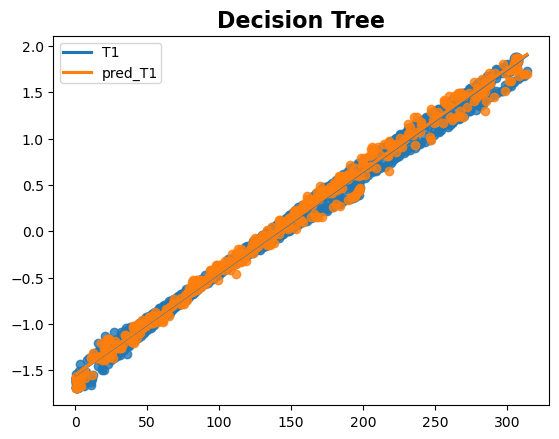

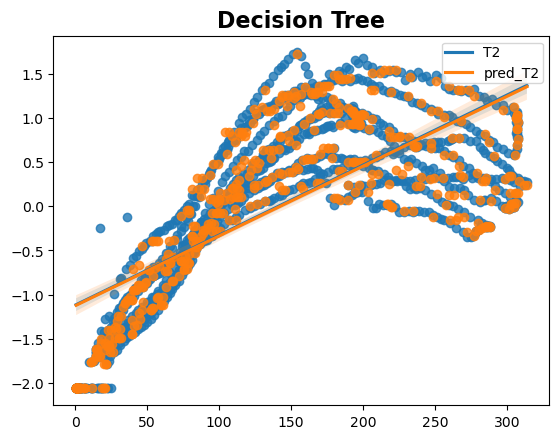

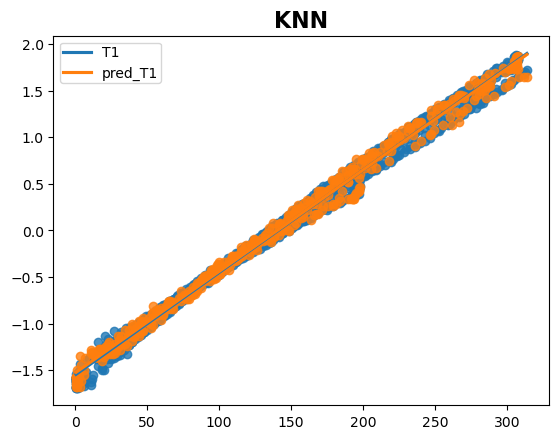

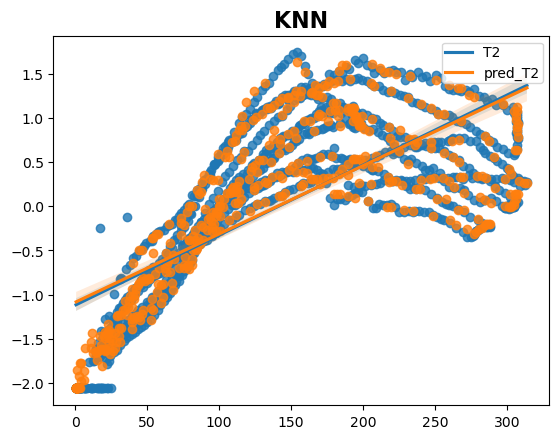

In [12]:
#Hold-Out (60/40)
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.40, shuffle=True)

for nombre,modelo in modelos:
    modelo.fit(X_train,y_train)
    y_pred = modelo.predict(X_test)
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,np.sum((y_test-y_pred)**2)))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,mean_absolute_error(y_test,y_pred)))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,mean_squared_error(y_test,y_pred)))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,mean_squared_error(y_test,y_pred,squared=False)))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,mean_absolute_percentage_error(y_test,y_pred)))

resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [13]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99764297])),
 ('Decision Tree', array([0.99606016])),
 ('LR', array([0.87820966]))]

In [14]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.9952915])),
 ('Decision Tree', array([0.99213584])),
 ('LR', array([0.7712522]))]

In [15]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 217.69581053873083),
 ('Decision Tree', 7.495430046249101),
 ('KNN', 4.709152435857806)]

In [16]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.3080594676755372),
 ('Decision Tree', 0.05530219396587489),
 ('KNN', 0.037286839403353284)]

In [17]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 4.523732229778926),
 ('Decision Tree', 0.34337785191620585),
 ('KNN', 0.1928712126111216)]

In [18]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.22676646931117814),
 ('Decision Tree', 0.007807739631509489),
 ('KNN', 0.004905367120685218)]

In [19]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.3718670871278912),
 ('Decision Tree', 0.08452098358124079),
 ('KNN', 0.06703585191479144)]

In [20]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()

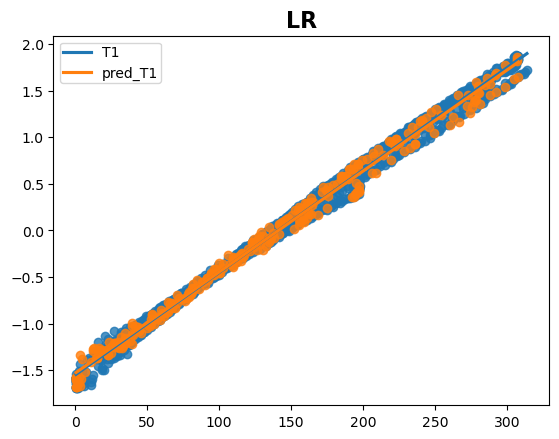

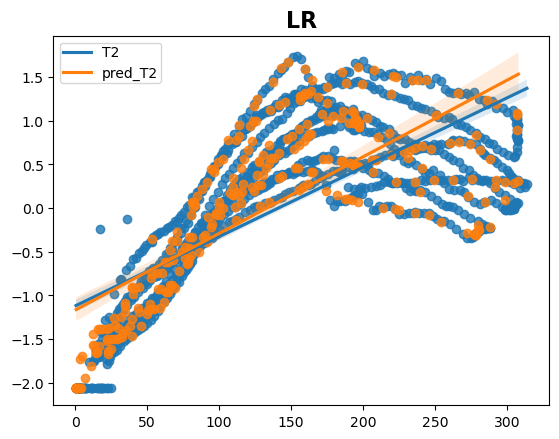

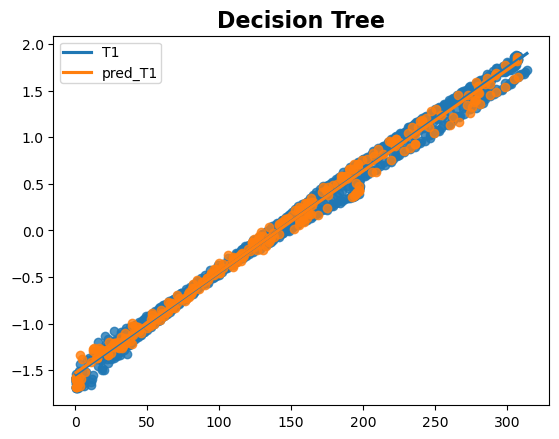

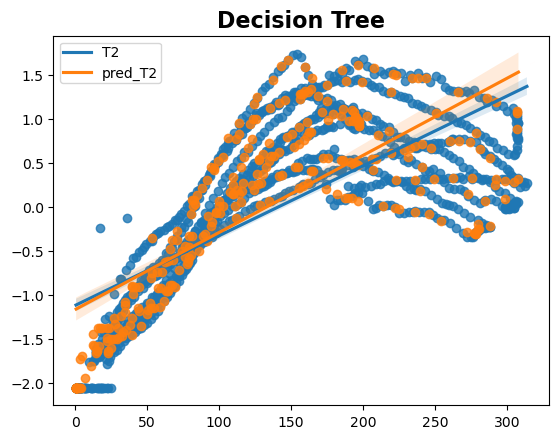

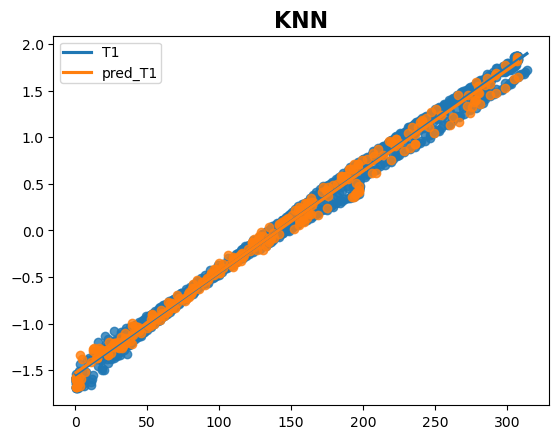

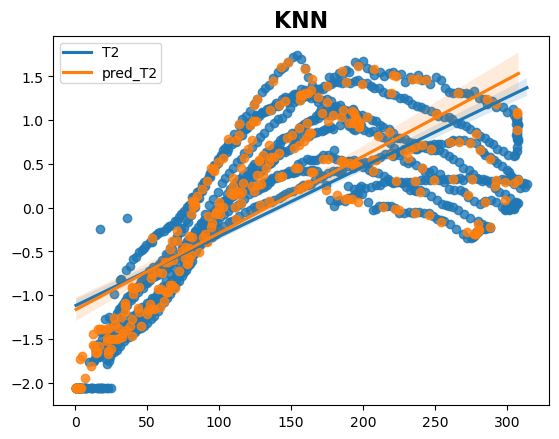

In [21]:
#Random subsampling (N=30)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]

l_test = [0,0,0]
l_pred = [0,0,0]

for i in range(30):
    j=0
    X_train, X_test, y_train, y_test = train_test_split(X, y2, shuffle=True)

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
            
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        j += 1
        
j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 30
        l_pred[j][k] /= 30
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/30))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/30))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/30))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/30))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/30))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/30))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/30))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [22]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99779759])),
 ('Decision Tree', array([0.99550328])),
 ('LR', array([0.8802763]))]

In [23]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.99560079])),
 ('Decision Tree', array([0.99103026])),
 ('LR', array([0.77496381]))]

In [24]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 133.08779819266334),
 ('Decision Tree', 5.330562582708644),
 ('KNN', 2.6852526394592164)]

In [25]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.30630857480869295),
 ('Decision Tree', 0.050189229405025695),
 ('KNN', 0.031145992913765904)]

In [26]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 2.8983087597376755),
 ('Decision Tree', 0.27267825380960925),
 ('KNN', 0.14725613623234995)]

In [27]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.2218129969877722),
 ('Decision Tree', 0.008884270971181076),
 ('KNN', 0.004475421065765362)]

In [28]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.36902981754155956),
 ('Decision Tree', 0.08599976697573158),
 ('KNN', 0.06039079428191123)]

In [29]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()

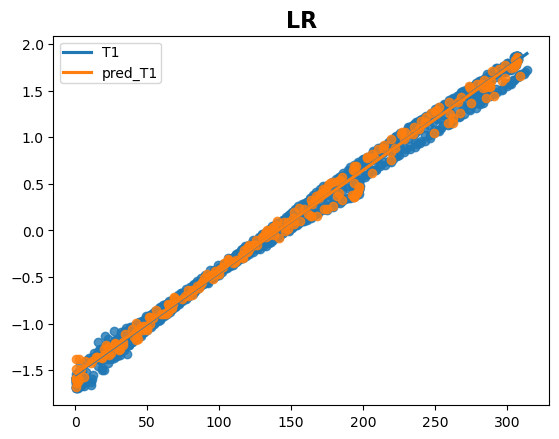

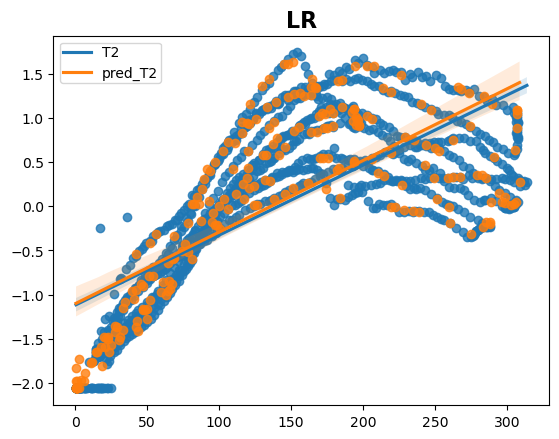

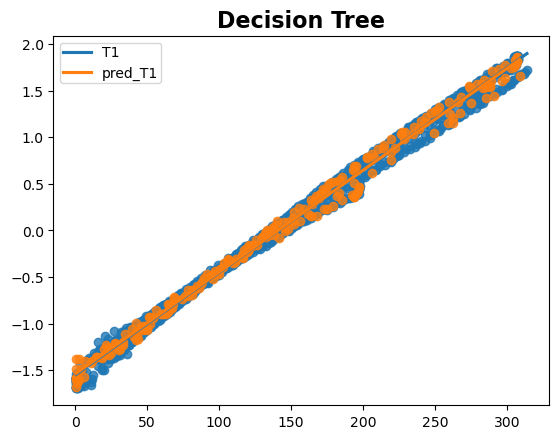

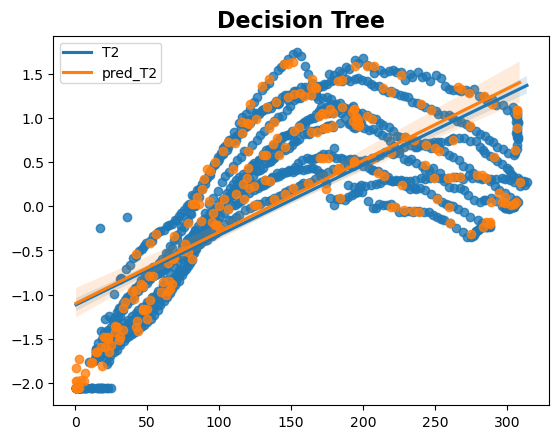

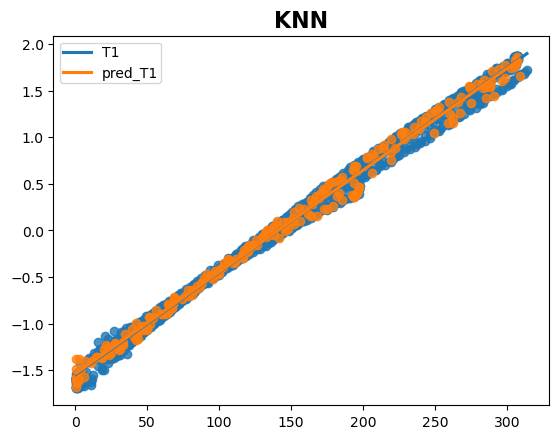

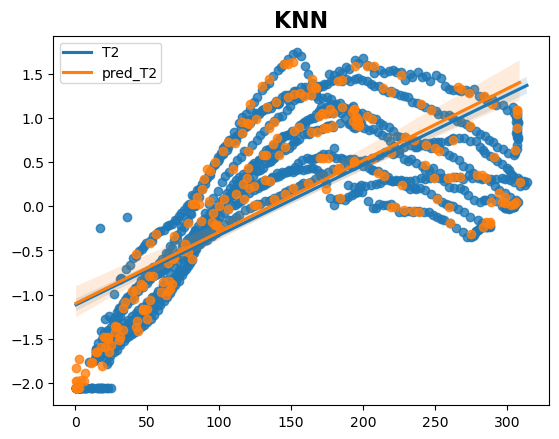

In [30]:
#K-fold (K=5)
R = [0,0,0]
R2 = [0,0,0]
SSE = [0,0,0]
MAE = [0,0,0]
MSE = [0,0,0]
RMSE = [0,0,0]
MAPE = [0,0,0]
l_test = [0,0,0]
l_pred = [0,0,0]

i = 0

kf = KFold(n_splits=5, shuffle=True)

for train,test in kf.split(X):
    j=0
    X_train, X_test, y_train, y_test = X[train], X[test], y2[train], y2[test]

    for nombre,modelo in modelos:
        modelo.fit(X_train,y_train)
        y_pred = modelo.predict(X_test)
        if i == 0:
            l_test[j] = y_test
            l_pred[j] = y_pred
            if nombre == "KNN":
                i = 1
        else:
            for k in range(len(y_test)):
                l_test[j][k] += y_test[k]
                l_pred[j][k] += y_pred[k]
        
        #R (Pearson correlation coefficient)
        R[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))
        #R2 (coefficient of determination)
        R2[j] += r_regression(y_test.reshape(-1,1),y_pred.reshape(-1,1))**2
        #SSE (sum of squared errors)
        SSE[j] += np.sum((y_test-y_pred)**2)
        #MAE (mean absolute error)
        MAE[j] += mean_absolute_error(y_test,y_pred)
        #MAPE (Mean Absolute Percentage Error)
        MAPE[j] += mean_absolute_percentage_error(y_test,y_pred)
        #MSE (mean squared error)
        MSE[j] += mean_squared_error(y_test,y_pred)
        #RMSE (root mean squared error)
        RMSE[j] += mean_squared_error(y_test,y_pred,squared=False)
        
        j += 1

j=0
for nombre, modelo in modelos:
    for k in range(len(y_test)):
        l_test[j][k] /= 5
        l_pred[j][k] /= 5
    
    fig, ax = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,0], line_kws={'label': 'T1'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,0], line_kws={'label': 'pred_T1'})
    ax.legend(borderpad=.2)
    ax.set_title(nombre,fontsize=16, weight="bold")
    fig, bx = plt.subplots()
    sns.regplot(x = np.array(X)[:,0], y = np.array(y2)[:,1], line_kws={'label': 'T2'})
    sns.regplot(x = np.array(X_test)[:,0], y = np.array(y_pred)[:,1], line_kws={'label': 'pred_T2'})
    bx.legend(borderpad=.2)
    bx.set_title(nombre,fontsize=16, weight="bold")
    
    #R (Pearson correlation coefficient)
    resultado_R.append((nombre,R[j]/5))
    #R2 (coefficient of determination)
    resultado_R2.append((nombre,R2[j]/5))
    #SSE (sum of squared errors)
    resultado_SSE.append((nombre,SSE[j]/5))
    #MAE (mean absolute error)
    resultado_MAE.append((nombre,MAE[j]/5))
    #MAPE (Mean Absolute Percentage Error)
    resultado_MAPE.append((nombre,MAPE[j]/5))
    #MSE (mean squared error)
    resultado_MSE.append((nombre,MSE[j]/5))
    #RMSE (root mean squared error)
    resultado_RMSE.append((nombre,RMSE[j]/5))
    
    j += 1
    
resultado_R.sort(key=lambda k:k[1], reverse=True)
resultado_R2.sort(key=lambda k:k[1], reverse=True)
resultado_SSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAE.sort(key=lambda k:k[1], reverse=True)
resultado_MSE.sort(key=lambda k:k[1], reverse=True)
resultado_RMSE.sort(key=lambda k:k[1], reverse=True)
resultado_MAPE.sort(key=lambda k:k[1], reverse=True)

In [31]:
print("R (Pearson correlation coefficient)")
resultado_R

R (Pearson correlation coefficient)


[('KNN', array([0.99765242])),
 ('Decision Tree', array([0.9965233])),
 ('LR', array([0.88070963]))]

In [32]:
print("R2 (coefficient of determination)")
resultado_R2

R2 (coefficient of determination)


[('KNN', array([0.99531377])),
 ('Decision Tree', array([0.99306333])),
 ('LR', array([0.77566757]))]

In [33]:
print("SSE (sum of squared errors)")
resultado_SSE

SSE (sum of squared errors)


[('LR', 107.82298922249254),
 ('Decision Tree', 3.2896352828566497),
 ('KNN', 2.2379872860360863)]

In [34]:
print("MAE (mean absolute error)")
resultado_MAE

MAE (mean absolute error)


[('LR', 0.30872736465548634),
 ('Decision Tree', 0.04556161205451323),
 ('KNN', 0.02992526457237101)]

In [35]:
print("MAPE (Mean Absolute Percentage Error)")
resultado_MAPE

MAPE (Mean Absolute Percentage Error)


[('LR', 3.014626858509751),
 ('Decision Tree', 0.2559381345728692),
 ('KNN', 0.1299550524492877)]

In [36]:
print("MSE (mean squared error)")
resultado_MSE

MSE (mean squared error)


[('LR', 0.22484096098167328),
 ('Decision Tree', 0.006855901848919562),
 ('KNN', 0.004664766204798937)]

In [37]:
print("RMSE (root mean squared error)")
resultado_RMSE

RMSE (root mean squared error)


[('LR', 0.3714507851821585),
 ('Decision Tree', 0.07577771348952901),
 ('KNN', 0.05873486630188315)]

In [38]:
resultado_R.clear()
resultado_R2.clear()
resultado_SSE.clear()
resultado_MAE.clear()
resultado_MSE.clear()
resultado_RMSE.clear()
resultado_MAPE.clear()
R.clear()
R2.clear()
SSE.clear()
MAE.clear()
MAPE.clear()
MSE.clear()
RMSE.clear()
l_test.clear()
l_test.clear()
l_test.clear()
l_pred.clear()
l_pred.clear()
l_pred.clear()